In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/tweets-related-to-coke-studio-weekly-updated/coke_studio.csv


# **Loading Libraries**

In [2]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


Let's read train and test datasets

In [3]:
df = pd.read_csv("../input/tweets-related-to-coke-studio-weekly-updated/coke_studio.csv")

## **Text PreProcessing and Cleaning**
### **Data Inspection** 

Let's check out  tweets.

In [4]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (1415, 36)
Columns are: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


The dataset has 1415 rows and 36 columns.

From our case we are only interested in the `tweet`, `hashtags` and `date` columns. We shall drop the rest for now.

In [5]:
# use the drop columns function to streamline the dataset
df = df.drop(columns=['id', 'time','user_id','username','conversation_id','created_at','timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'likes_count', 'cashtags', 'link', 'retweet','retweets_count', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date'])
df.head(10)

,date,tweet,language,hashtags,thumbnail,translate,trans_src,trans_dest
0,2022-04-02,Pakistanis be avoiding music whole Ramzan but listening to Coke Studio Qawalis🤡🤡🤡,en,[],NaN,NaN,NaN,NaN
1,2022-04-02,@cokestudio coke coffee? cofefe?,en,[],NaN,NaN,NaN,NaN
2,2022-04-02,"@SalmanSufi7 @cokestudio Coke Studio does not run on foreign funding, neither it carries foreign agenda. These NGOs everyone know are working on funds &amp; has agenda.",en,[],NaN,NaN,NaN,NaN
3,2022-04-02,why is there no coke studio us,en,[],NaN,NaN,NaN,NaN
4,2022-04-02,Coke studio Bangla drops second song by Momtaz and Mizan https://t.co/Bxfym1wfgR,en,[],NaN,NaN,NaN,NaN
5,2022-04-02,Music coming out of Pakistan has been incredible recently. Quite possibly the best coke studio season to date 🎧,en,[],NaN,NaN,NaN,NaN
6,2022-04-02,@anuskills3 Haikwenda kwa ukubwa ndo maana baada ya hapo show za nje zilififia akaishia kupiga show E. Africa Angalau ujio wa coke studio ukamuinua ila bado akajisahau tena nyumbani wanataka nin...,in,[],NaN,NaN,NaN,NaN
7,2022-04-02,@Giant962 @anuskills3 Ile project haikuwa kubwa na haikuenda kwa kasi ndo maana baada ya hapo anguko la alikiba likawa kubwa ashukuru tu aliingia kwenye coke studio Africa akawa anaendeleza jina l...,tl,[],NaN,NaN,NaN,NaN
8,2022-04-02,Ramadan Mubarak! May Almighty Allah forgive us in this great month. The 99 names of Allah (SWT) Coke Studio Special | Asma-ul-Husna | The 99 Names | Atif Aslam https://t.co/3EVESONNdf via @YouTube,en,[],NaN,NaN,NaN,NaN
9,2022-04-02,"@HBukhari I'm sure it's the last coke studio song ""phir milenge"". Such great poetry.",en,[],NaN,NaN,NaN,NaN


In [6]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
df.info()

Dataset size: (1415, 8)
Columns are: Index(['date', 'tweet', 'language', 'hashtags', 'thumbnail', 'translate',
       'trans_src', 'trans_dest'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1415 non-null   object 
 1   tweet       1415 non-null   object 
 2   language    1415 non-null   object 
 3   hashtags    1415 non-null   object 
 4   thumbnail   111 non-null    object 
 5   translate   0 non-null      float64
 6   trans_src   0 non-null      float64
 7   trans_dest  0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 88.6+ KB


In [7]:
#convert data to datetime and strings for manipulation.
df["tweet"]= df["tweet"].astype(str)
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1415 non-null   datetime64[ns]
 1   tweet       1415 non-null   object        
 2   language    1415 non-null   object        
 3   hashtags    1415 non-null   object        
 4   thumbnail   111 non-null    object        
 5   translate   0 non-null      float64       
 6   trans_src   0 non-null      float64       
 7   trans_dest  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 88.6+ KB


## Data Pre-processing

### Characteristic features of Tweets 

From the perspective of Sentiment
Analysis, we discuss a few characteristics of Twitter:

**Length of a Tweet**
     The maximum length of a Twitter message is 140 characters. This means that we can practically consider a tweet to be a single sentence, void of complex grammatical constructs. This is a vast difference from traditional subjects of Sentiment Analysis, such as movie reviews. 
     
**Language used**
     Twitter is used via a variety of media including SMS and mobile phone apps. Because of this and the 140-character limit, language used in Tweets tend be more colloquial, and filled with slang and misspellings. Use of hashtags also gained popularity on Twitter and is a primary feature in any given tweet. 
     
**Data availability**
     Another difference is the magnitude of data available. With the Twitter API, it is easy to collect millions of tweets for training. There also exist a few datasets that have automatically and manually labelled the tweets. 
     
**Domain of topics**
     People often post about their likes and dislikes on social media. These are not all concentrated around one topic. 

### Cleaning The Data

### Common data cleaning steps on all text:

Make text all lower case
Remove punctuation
Remove numerical values
Remove common non-sensical text (/n)
Tokenize text
Remove stop words
More data cleaning steps after tokenization:

Stemming / lemmatization
Parts of speech tagging
Create bi-grams or tri-grams
Deal with typos

### Specific Tweet oriented cleaning using the  tweet-preprocessor module

### A) Removing Twitter Handles (@user)

As mentioned above, the tweets contain lots of twitter handles (@user), that is how a Twitter user acknowledged on Twitter. We will remove all these twitter handles from the data as they don’t convey much information.

### B) Removing Punctuations,Links, Numbers, and Special Characters

As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles.

### C) Tokenization
Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

### D) Stemming
Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.


In [8]:
import string

import nltk
from nltk.corpus import stopwords
from nltk import re

MIN_YEAR = 1900
MAX_YEAR = 2100


def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')


def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


def get_hashtags_pattern():
    return re.compile(r'#\w*')


def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')


def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')


def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')


def get_mentions_pattern():
    return re.compile(r'@\w*')


def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False


class TwitterPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()

    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self

In [9]:
# Clean tweets and append to new column
tweets = df['tweet']
clean_tweets = []
for tweet in tweets:
    c = TwitterPreprocessor((tweet))
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)
    
df['clean_tweets'] = clean_tweets 
df.head(5)

,date,tweet,language,hashtags,thumbnail,translate,trans_src,trans_dest,clean_tweets
0,2022-04-02,Pakistanis be avoiding music whole Ramzan but listening to Coke Studio Qawalis🤡🤡🤡,en,[],NaN,NaN,NaN,NaN,Pakistanis avoiding music whole Ramzan listening Coke Studio Qawalis🤡🤡🤡
1,2022-04-02,@cokestudio coke coffee? cofefe?,en,[],NaN,NaN,NaN,NaN,coke coffee cofefe
2,2022-04-02,"@SalmanSufi7 @cokestudio Coke Studio does not run on foreign funding, neither it carries foreign agenda. These NGOs everyone know are working on funds &amp; has agenda.",en,[],NaN,NaN,NaN,NaN,Coke Studio run foreign funding neither carries foreign agenda These NGOs everyone know working funds amp agenda
3,2022-04-02,why is there no coke studio us,en,[],NaN,NaN,NaN,NaN,coke studio us
4,2022-04-02,Coke studio Bangla drops second song by Momtaz and Mizan https://t.co/Bxfym1wfgR,en,[],NaN,NaN,NaN,NaN,Coke studio Bangla drops second song Momtaz Mizan


## **Story Generation and Visualization from Tweets**
### **A) Understanding the common words used in the tweets: WordCloud**

Now we want to understand the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

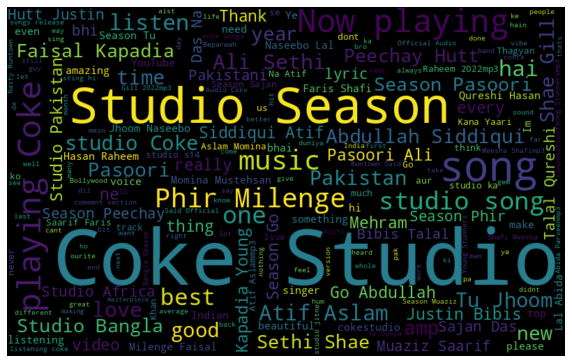

In [10]:

all_words = ' '.join([text for text in df['clean_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Sentiment Analysis Using VADER**

Creating your own sentiment analysis model from scratch can be very difficult and tedious for a few reason. You need to find relevant data to your problem, create a LOT of labeled data for training, and you must perform data clean up and NLP pre-processing. Luckily for us, VADER is a readily available pre-trained sentiment analysis that thrives on social media data. 
Some of the big advantages include:
1. Analysis of polarity (positive or negative sentiment) as well as valence (intensity of the sentiment — i.e. ‘excellent’ has a higher intensity than ‘good’).
2. Handles slang (‘lol’, ‘sux’) and emojis, which are prevalent in tweets
3. Accounts for capital letters and punctuation (i.e. ‘GOOD!!’ is more positive than ‘good’)

For more information on VADER you can access the [github repository](https://github.com/cjhutto/vaderSentiment) or the [paper written by the authors](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf). 
For other sentiment analysis tools you can check out this [github page.](https://github.com/laugustyniak/awesome-sentiment-analysis).

The first analysis we are going to do is to plot a histogram of all of the sentiment scores we collected on our tweets. 


In [11]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


(array([  6.,  14.,  14.,  34.,  19.,  39.,  17.,  27.,  12., 691.,  15.,
        124.,  31.,  70.,  64.,  54.,  87.,  45.,  35.,  17.]),
 array([-0.866   , -0.773335, -0.68067 , -0.588005, -0.49534 , -0.402675,
        -0.31001 , -0.217345, -0.12468 , -0.032015,  0.06065 ,  0.153315,
         0.24598 ,  0.338645,  0.43131 ,  0.523975,  0.61664 ,  0.709305,
         0.80197 ,  0.894635,  0.9873  ]),
 <BarContainer object of 20 artists>)

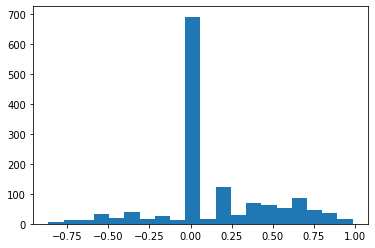

In [13]:
# create analyzer object 
analyzer = SentimentIntensityAnalyzer()

# get a list of scores and plot
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['clean_tweets']]
plt.hist(scores, bins=20)

VADER gives back 4 types of polarity scores for every call: Positive, negative, neutral or compound. 

In our code, we only consider the compound score  which is a combination of the other three plus some additional rules and a normalization between -1 and 1. 

One thing to notice from our histogram is that many tweets have a neutral score, and there are only slightly more negative ones in this sample.


In [14]:
sentiment = df['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


,date,tweet,language,hashtags,thumbnail,translate,trans_src,trans_dest,clean_tweets,neg,neu,pos,compound
0,2022-04-02,Pakistanis be avoiding music whole Ramzan but listening to Coke Studio Qawalis🤡🤡🤡,en,[],NaN,NaN,NaN,NaN,Pakistanis avoiding music whole Ramzan listening Coke Studio Qawalis🤡🤡🤡,0.231,0.769,0.0,-0.34
1,2022-04-02,@cokestudio coke coffee? cofefe?,en,[],NaN,NaN,NaN,NaN,coke coffee cofefe,0.000,1.000,0.0,0.00
2,2022-04-02,"@SalmanSufi7 @cokestudio Coke Studio does not run on foreign funding, neither it carries foreign agenda. These NGOs everyone know are working on funds &amp; has agenda.",en,[],NaN,NaN,NaN,NaN,Coke Studio run foreign funding neither carries foreign agenda These NGOs everyone know working funds amp agenda,0.000,1.000,0.0,0.00
3,2022-04-02,why is there no coke studio us,en,[],NaN,NaN,NaN,NaN,coke studio us,0.000,1.000,0.0,0.00
4,2022-04-02,Coke studio Bangla drops second song by Momtaz and Mizan https://t.co/Bxfym1wfgR,en,[],NaN,NaN,NaN,NaN,Coke studio Bangla drops second song Momtaz Mizan,0.000,1.000,0.0,0.00


## Analyzing Sentiment
First let’s just call `df.describe()` and get some basic information on our dataset now .

In [15]:
df.describe()

,translate,trans_src,trans_dest,neg,neu,pos,compound
count,0.0,0.0,0.0,1415.000000,1415.000000,1415.000000,1415.000000
mean,NaN,NaN,NaN,0.042637,0.828567,0.120305,0.129477
std,NaN,NaN,NaN,0.108980,0.210776,0.177705,0.344272
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.866000
25%,NaN,NaN,NaN,0.000000,0.687000,0.000000,0.000000
50%,NaN,NaN,NaN,0.000000,0.878000,0.000000,0.000000
75%,NaN,NaN,NaN,0.000000,1.000000,0.209000,0.361200
max,NaN,NaN,NaN,0.778000,1.000000,1.000000,0.987300


Looking at the compound score we can see on average tweets are neutral, with a mean sentiment of .001.

Plotting this data will give us a better idea of what it looks like. Before we plot we make a few changes to the dataframe for ease of use, sorting all the values by timestamp so they’re in order, copying the timestamp to the index to make graphing easier, and calculating an expanding and rolling mean for compound sentiment scores.

In [16]:
df.index = pd.to_datetime(df['date'])
df = df.sort_index()
df['mean'] = df['compound'].expanding().mean()
df['rolling'] = df['compound'].rolling('1d').mean()

Now using matplotlib, with import matplotlib.pyplot as plt, we can create a quick chart of our tweets and their sentiment over time.

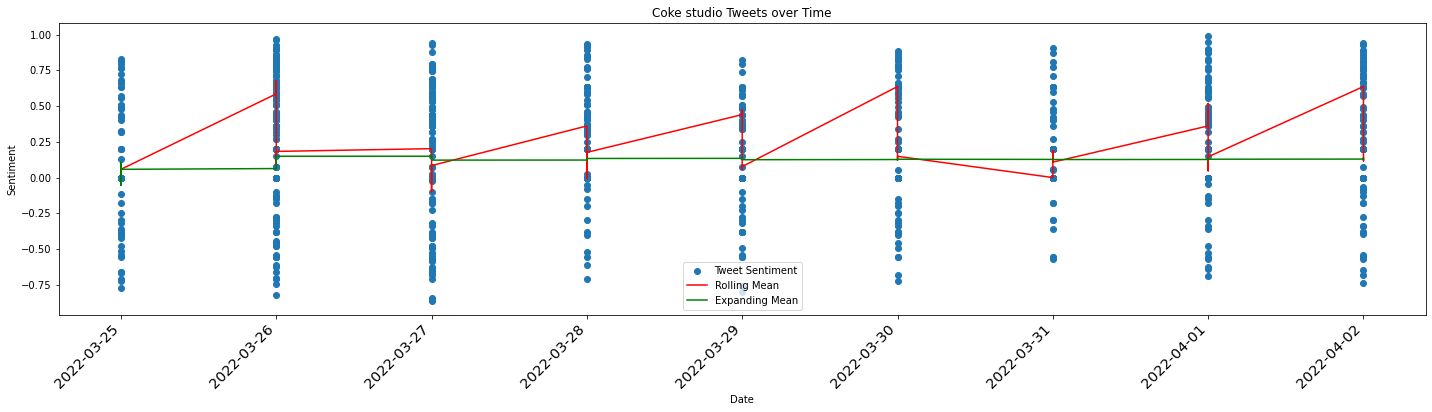

In [17]:
import datetime as dt

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['compound'], label='Tweet Sentiment')
ax.plot(df['date'],df['rolling'], color ='r', label='Rolling Mean')
ax.plot(df['date'],df['mean'], color='g', label='Expanding Mean')
ax.set(title='Coke studio Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

Let’s try to tackle things one at a time here. First let’s look at those tweets with a sentiment of 0. Seborn’s distplot is a quick way to see the distribution of sentiment scores across our tweets.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


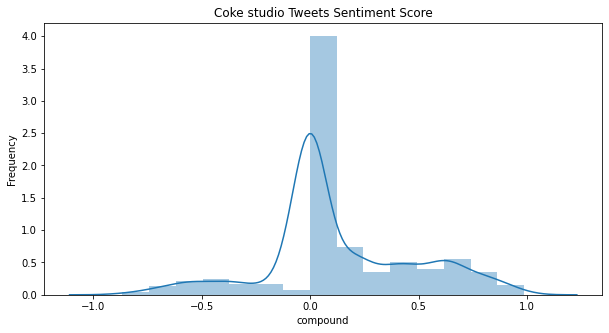

In [18]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Coke studio Tweets Sentiment Score', xlabel='Compund Sentiment Score', ylabel='Frequency')
sns.distplot(df['compound'], bins=15, ax=ax)
plt.show()